In [1]:
import re  # re module <- regex
from collections import Counter  # 사용 빈도 라이브러리
import pandas as pd
import os
import matplotlib as plt

In [2]:
value = """
# Lv0

## 두 수의 곱

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120804
-   python

```py
def solution(num1, num2):
    return num1 * num2
```


## 두 수의 차

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120803
-   python

```py
def solution(num1, num2):
    return num1 - num2
```


## 두 수의 합

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120802
-   python

```py
def solution(num1, num2):
    return num1 + num2
```


## 나머지 구하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120810
-   python

```py
def solution(num1, num2):
    return num1 % num2
```

## 숫자 비교하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120807
-   python

```py
def solution(num1, num2):
    if num1 == num2: return 1
    else: return -1

# 3항 연산자로 표현하기
# A if 조건 else B
def solution(num1, num2):
    return 1 if num1 == num2 else -1

def solution(num1, num2):
    answer = 1 if num1 == num2 else -1
    return answer

def solution(num1, num2):
    answer = {num1 == num2 : 1, num1 != num2 : -1}.get(True, -1)
    return answer
```

## 나이 출력

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120820
-   python

```py
def solution(age):
    return 2022 - age + 1
```

## 각도기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120829
-   python

```py
def solution(angle):
    if angle < 90:
        return 1
    elif angle == 90:
        return 2
    elif angle < 180:
        return 3
    elif angle == 180:
        return 4
    return answer

# 3항 연산자로 표현하기
# A if 조건 else B if 조건 else C

# error 코드
# def solution(angle):
#     return 1 if angle < 90 elif angle == 90 2 elif angle < 180 3 elif angle == 180 4

def solution(angle):
    return 1 if angle < 90 else 2 if angle == 90 else 3 if angle < 180 else 4 if angle == 180 else -1

```

## 두 수의 나눗셈

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120806
-   python

```py
def solution(num1, num2):
    answer = 0
    return int(num1 / num2 * 1000)
```

## 배열의 평균값

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120817
-   python

```py
def solution(numbers):
    return sum(numbers)/len(numbers)

# 다차원 배열의 합도 구할 수 있음
import numpy as np

def solution(numbers):
    return np.sum(numbers)/len(numbers)
```

## 짝수의 합

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120831
-   python

```py
def solution(n):
    answer = 0
    for i in range(0, n+1, 2):
        answer += i
    return answer

def solution(n):
    return sum([i for i in range(2, n + 1, 2)])

def solution(n):
    answer = sum(range(2, n + 1, 2)) # list로 형변환 할 필요 없습니다.
    return answer
```

## 중복된 숫자 개수

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120583
-   python

```py
def solution(array, n):
    return array.count(n)

from collections import Counter

def solution(array, n):
    return Counter(array).get(n)
```

## 머쓱이보다 키 큰 사람

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120585
-   python

```py
def solution(array, height):
    count = 0
    for i in array:
        if  i > height:
            count += 1
    return count

def solution(array, height):
    array.append(height)
    array.sort(reverse=True)
    return array.index(height)

def solution(array, height):
    return len(list(filter(lambda x:x > height, array)))
```

## 양꼬치

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120830
-   python

```py
def solution(n, k):
    if n >= 10:
        k -= n // 10

    return n*12000 + k*2000

def solution(n, k):
    return 12000 * n + 2000 * (k - n // 10)
```

## 편지

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120898
-   python

```py
def solution(message):
    return len(message) * 2
```

## 자릿수 더하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120906
-   python

```py
def solution(n):
    answer = 0
    for i in str(n):
        answer += int(i)
    return answer

def solution(n):
    answer = sum(list(map(int, str(n))))
    return answer
```

## 피자 나눠 먹기(3)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120816
-   python

```py
def solution(slice, n):
    for i in range(51):
        if n <= i * slice:
            break
    return i
```

## 문자열 뒤집기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120822
-   python

```py
def solution(my_string):
    return my_string[::-1]

def solution(my_string):
    return ''.join(reversed(list(my_string)))
```

## 배열 원소의 길이

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120854
-   python

```py
def solution(strlist):
    return list(map(lambda x : len(x), strlist))

def solution(strlist):
    answer = []
    return [ len(i) for i in strlist ]
```

## 피자 나눠 먹기 (1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120814
-   python

```py
def solution(n):
    return ((n - 1) // 7) + 1

import math

def solution(n):
    return math.ceil(n / 7)
```

## 문자열안에 문자열

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120908
-   python

```py
def solution(str1, str2):
    return 2 if str1.find(str2) == -1 else 1

def solution(str1, str2):
    return 1 if str2 in str1 else 2
```

## 짝수 홀수 개수

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120824
-   python

```py
def solution(num_list):
    짝수 = 0
    홀수 = 0
    for i in num_list:
        if i % 2 == 0:
            짝수 += 1
        else:
            홀수 += 1

    return [짝수, 홀수]

def solution(num_list):
    answer = [0,0]
    for n in num_list:
        answer[n % 2] += 1
    return answer

def solution(num_list):
    나머지 = list(map(lambda v : v % 2, num_list))
    return [나머지.count(0), 나머지.count(1)]
```

## 배열 뒤집기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120821
-   python

```py
def solution(num_list):
    return num_list[::-1] # slicing의 연산 가산이 있습니다.
```

## 가장 큰 수 찾기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120899
-   python

```py
def solution(array):
    return [max(array), array.index(max(array))]
```

## 아이스 아메리카노

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120819
-   python

```py
def solution(money):
    return [money//5500, money%5500]
```

## 최댓값 만들기(1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120847
-   python

```py
def solution(numbers):
    numbers.sort()
    return numbers[-2] * numbers[-1]

def solution(numbers):
    numbers.sort(reverse=True)
    return numbers[0]*numbers[1]

def solution(numbers):
    v = list(reversed(sorted(numbers)))
    return v[0] * v[1]
```

## 약수 구하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120897
-   python

```py
def solution(n):
    answer = []
    for i in range(1, n+1):
        if n % i == 0:
            answer.append(i)
    return answer


def solution(n):
    answer = [i for i in range(1,n+1) if n%i == 0]
    return answer
```

## 배열 두 배 만들기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120809
-   python

```py
def solution(numbers):
    answer = [i * 2 for i in numbers]
    return answer

def solution(numbers):
    return list(map(lambda x : x * 2, numbers))

import numpy as np

def solution(numbers):
    return (np.array(numbers) * 2).tolist()
```

## 배열 자르기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120833
-   python

```py
def solution(numbers, num1, num2):
    return numbers[num1:num2+1]
```

## n의 배수 고르기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120905
-   python

```py
def solution(n, numlist):
    answer = []
    for i in numlist:
        if i % n == 0:
            answer.append(i)
    return answer

def solution(n, numlist):
    answer = [i for i in numlist if i%n==0]
    return answer
```

## 제곱수 판별하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120909
-   python

```py
def solution(n):
    return 1 if int(n ** 0.5) ** 2 == n else 2

def solution(n):
    return 1 if n ** 0.5 == int else 2

def solution(n):
    return 1 if (n ** 0.5).is_integer() else 2
```

## 짝수는 싫어요

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120813
-   python

```py
def solution(n):
    return [i for i in range(1, n + 1, 2)]
```

## 삼각형의 완성조건 (1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120889
-   python

```py
def solution(sides):
    sides.sort(reverse=True)
    return 1 if sides[0] < sides[1] + sides[2] else 2
```

## 옷가게 할인 받기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120818
-   python

```py
def solution(price):
    if price >= 500000:
        price *= 0.8
    elif price >= 300000:
        price *= 0.9
    elif price >= 100000:
        price *= 0.95
    return int(price)
```

## 점의 위치 구하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120841
-   python

```py
def solution(dot):
    x, y = dot
    if x >= 0 and y >= 0:
        return 1
    elif x < 0 and y >= 0:
        return 2
    elif x < 0 and y < 0:
        return 3
    elif x >= 0 and y < 0:
        return 4
    return answer
```

## 순서쌍의 개수

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120836
-   python

```py
# 시간초과
def solution(n):
    answer = []
    for i in range(1, n+1):
        for j in range(1, n+1):
            if i * j == n:
                answer.append([i, j])
    return len(answer)


def solution(n):
    answer = 0
    for i in range(n):
        if n % (i+1) == 0: # 나누어 떨어지면 매칭되는 값이 있다는 얘기임
            answer += 1
    return answer
```

## 모음 제거

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120849
-   python

```py
def solution(my_string):
    return my_string.replace('a', '').replace('e', '').replace('i', '').replace('o', '').replace('u', '')

def solution(my_string):
    answer = ''

    for c in my_string:
        if c in ['a', 'e', 'i', 'o', 'u']:
            continue
        answer += c

    return answer

import re

def solution(my_string):
    return re.sub(r"[aeiou]", "", my_string)
```

## 배열의 유사도

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120903
-   python

```py
def solution(s1, s2):
    answer = 0
    for i in s1:
        if i in s2:
            answer += 1
    return answer

def solution(s1, s2):
    return len(set(s1) & set(s2))

# 특이한 풀이
def solution(s1, s2):
    dic = {i:1 for i in s1}
    answer = sum(dic.get(j,0)for j in s2)
    return answer
```

## 특정 문자 제거하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120826
-   python

```py
def solution(my_string, letter):
    return my_string.replace(letter, '')

import re

solution = lambda s, l : re.sub(l, "" , s)
```

## 문자 반복 출력하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120825
-   python

```py
def solution(my_string, n):
    return ''.join(i*n for i in my_string)

def solution(my_string, n):
    answer = ''
    for i in my_string:
        answer += (i * n)
    return answer
```

## 세균 증식

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120910
-   python

```py
def solution(n, t):
    return n << t

def solution(n, t):
    return n*(2**(t))
```

## 숨어있는 숫자의 덧셈 (1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120851
-   python

```py
def solution(my_string):
    answer = 0
    for i in my_string:
        if i.isnumeric():
            answer += int(i)
    return answer

def solution(my_string):
    return sum(int(i) for i in my_string if i.isdigit())

import re

def solution(my_string):
    return sum(int(n) for n in re.sub('[^1-9]', '', my_string))
```

## 개미군단

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120837
-   python

```py
def solution(hp):
    answer = hp // 5
    hp = hp % 5
    answer += hp // 3
    hp = hp % 3
    answer += hp // 1
    return answer

def solution(hp):
    return hp // 5 + (hp % 5 // 3) + ((hp % 5) % 3)
```

## 문자열 정렬하기 (1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120850
-   python

```py
def solution(my_string):
    return sorted(int(i) for i in my_string if i.isdigit())
```

## 중앙값 구하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120811
-   python

```py
def solution(array):
    중앙 = len(array) // 2
    return sorted(array)[중앙]
```

## 직각삼각형 출력하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120823
-   python

```py
n = int(input())
for i in range(n):
    print('*' * (i+1))
```

## 대문자와 소문자

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120893
-   python

```py
def solution(my_string):
    answer = ''
    for i in my_string:
        if i.isupper():
            answer += i.lower()
        else:
            answer += i.upper()
    return answer
```

## 가위 바위 보 - 22년 12월 10일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120839
-   python

```py
def solution(rsp):
    d = {'0':'5','2':'0','5':'2'}
    return ''.join(d[i] for i in rsp)

def solution(rsp):
    answer = ''
    for i in rsp:
        if i == "0":
            answer += '5'
        elif i == "2":
            answer += '0'
        else:
            answer += '2'
    return answer

def solution(rsp):
    rsp = rsp.replace('2','s')
    rsp = rsp.replace('5','p')
    rsp = rsp.replace('0','r')
    rsp = rsp.replace('r','5')
    rsp = rsp.replace('s','0')
    rsp = rsp.replace('p','2')
    return rsp
```

## 문자열 정렬하기 (2)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120911
-   python

```py
def solution(my_string):
    return ''.join(sorted(my_string.lower()))
```

## 배열 회전시키기 - 22년 12월 11일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120844
-   python

```py
from collections import deque

def solution(numbers, direction):
    numbers = deque(numbers)
    if direction == "right": direction = 1
    if direction == "left": direction = -1
    numbers.rotate(direction)
    return list(numbers)

def solution(numbers, direction):
    return [numbers[-1]] + numbers[:-1] if direction == 'right' else numbers[1:] + [numbers[0]]
```

## 피자 나눠 먹기 (2)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120815
-   python

```py
def solution(n):
    for answer in range(1, 1000):
        if (answer * 6) % n == 0:
            return answer
    return answer

def solution(n):
    i = 1
    while(1):
        if (6 * i) % n == 0:
            return i
        i += 1
```

## 숫자 찾기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120904
-   python

```py
def solution(num, k):
    num = str(num)
    k = str(k)
    if not k in num:
        answer = -1
    else:
        answer = num.find(k) + 1
    return answer
```

## 주사위의 개수

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120845
-   python

```py
def solution(box, n):
    return (box[0] // n) * (box[1] // n) * (box[2] // n)
```

## 외계행성의 나이 - 22년 12월 11일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120834
-   python

```py
def solution(age):
    answer = ''
    for i in str(age):
        answer += str(chr(int(i) + 97))
    return answer
```

## 암호 해독

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120892
-   python

```py
def solution(cipher, code):
    return cipher[code-1::code]
```

## 인덱스 바꾸기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120895
-   python

```py
def solution(my_string, num1, num2):
    answer = my_string[:num1] + my_string[num2] + my_string[num1+1:num2] + my_string[num1] + my_string[num2+1:]
    return answer

def solution(my_string, num1, num2):
    s = list(my_string)
    s[num1],s[num2] = s[num2],s[num1]
    return ''.join(s)
```

## 최댓값 만들기 (2)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120862
-   python

```py
def solution(numbers):
    numbers.sort()
    if numbers[0] * numbers[1] > numbers[-1] * numbers[-2]:
        return numbers[0] * numbers[1]
    return numbers[-1] * numbers[-2]

def solution(numbers):
    numbers = sorted(numbers)
    return max(numbers[0] * numbers[1], numbers[-1]*numbers[-2])
```

## 369게임

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120891
-   python

```py
def solution(order):
    answer = str(order).count('3')
    answer += str(order).count('6')
    answer += str(order).count('9')
    return answer

def solution(order):
    return sum(map(lambda x: str(order).count(str(x)), [3, 6, 9]))

list(filter(lambda x : x in '369', '29423'))

import re
re.findall('[369]', '29423')
```

## 7의 개수

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120912
-   python

```py
def solution(array):
    return ''.join(map(str, array)).count('7')
```

## 합성수 찾기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120846
-   python

```py
# 7 * 7 = 49를 놓침
def solution(n):
    answer = 0
    if n == 1 or n == 2 or n == 3:
        return 0
    for i in range(2, n+1):
        for j in range(2, i):
            if i % j == 0:
                answer += 1
                break
    return answer
```

## 모스부호 (1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120838
-   python

```py
def solution(letter):
    morse = morse = {
        ".-": "a",
        "-...": "b",
        "-.-.": "c",
        "-..": "d",
        ".": "e",
        "..-.": "f",
        "--.": "g",
        "....": "h",
        "..": "i",
        ".---": "j",
        "-.-": "k",
        ".-..": "l",
        "--": "m",
        "-.": "n",
        "---": "o",
        ".--.": "p",
        "--.-": "q",
        ".-.": "r",
        "...": "s",
        "-": "t",
        "..-": "u",
        "...-": "v",
        ".--": "w",
        "-..-": "x",
        "-.--": "y",
        "--..": "z",
    }
    answer = ''
    for i in letter.split(' '):
        answer += morse[i]
    return answer
```

## 중복된 문자 제거 - 12월 14일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120888
-   python

```py
def solution(my_string):
    answer = ''
    set(my_string) # 순서를 보장하지 않음
    for i in my_string:
        if not i in answer:
            answer += i
    return answer

def solution(my_string):
    return ''.join(dict.fromkeys(my_string))
```

## 2차원으로 만들기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120842
-   python

```py
def solution(num_list, n):
    answer = []
    for i in range(len(num_list)//n):
        answer.append(num_list[:n])
        num_list = num_list[n:]
    return answer

import numpy as np
def solution(num_list, n):
    li = np.array(num_list).reshape(-1,n)
    return li.tolist()

# 참고
# np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(4, 2) # 4행 2열
```

## A로 B 만들기 - 12월 15일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120886
-   python

```py
def solution(before, after):
    if len(before) != len(after):
        return 0
    before = list(before)
    after = list(after)
    for i in before:
        if not i in after:
            return 0
        else:
            after.remove(i)
    return 1

def solution(before, after):
    before=sorted(before)
    after=sorted(after)
    if before==after:
        return 1
    else:
        return 0

def solution(before, after):
    return 1 if sorted(list(before)) == sorted(list(after)) else 0
```

## 팩토리얼 - 12월 15일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120848
-   python

```py
def solution(n):
    f = 1
    i = 1
    while f <= n:
        i += 1
        f *= i
    return i - 1

from math import factorial

def solution(n):
    i = 1
    while factorial(i) <= n:
        i += 1
    return i - 1

####

def factorial(i):
    result = 1
    for j in range(1, i+1):
        result *= j
    return result

def solution(n):
    for i in range(1, 11):
        if factorial(i) <= n:
            answer = i
        else:
            break
    return answer

from math import factorial

def solution(n):
    k = 10
    while n < factorial(k):
        k -= 1
    return k
```

## k의 개수 - 12월 18일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120887
-   python

```py
def solution(i, j, k):
    return str([num for num in range(i, j+1)]).count(str(k))

def solution(i, j, k):
    return sum(map(lambda v: str(v).count(str(k)), range(i, j+1)))
```

## 가까운 수 - 12월 18일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120890
-   python

```py
def solution(array, n):
    value = sorted(array, key=lambda x:abs(n-x))
    if abs(value[0] - n) == abs(value[1] - n):
        return min(value[0], value[1])
    return sorted(array, key=lambda x:abs(n-x))[0]

def solution(array, n):
    sorted(array, key=lambda x:(abs(x-n),x-n))[0]

# 첫번째 인자를 오름차순
# 두번째 인자를 내림차순
# sorted(a, key=lambda x:(x[0], -x[1]))
```

## 한 번만 등장한 문자 - 12월 19일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120896
-   python

```py
import collections

def solution(s):
    answer = ''
    for i, j in collections.Counter(s).items():
        if j == 1:
            answer += i
    return ''.join(sorted(answer))

def solution(s):
    answer = "".join(sorted([ ch for ch in s if s.count(ch) == 1]))
    return answer
```

## 이진수 더하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120885
-   python

```py
def solution(bin1, bin2):
    return bin(int(bin1, 2) + int(bin2, 2))[2:]
```

## 잘라서 배열로 저장하기 - 12월 19일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120913
-   python

```py
import re

n = 3
p = re.compile(f'.{{1,{n}}}') #1 ~ n회 반복
print(p)
m = p.findall("python hello world hello")
print(m)

#########

import re

def solution(my_str, n):
    p = re.compile(f'.{{1,{n}}}') #1 ~ n회 반복
    return p.findall(my_str)

#########

import math

def solution(my_str, n):
    answer = []
    for i in range(math.ceil(len(my_str)/n)):
        answer.append(my_str[n * i : n * (i+1)])
    return answer

def solution(my_str, n):
    return [my_str[i: i + n] for i in range(0, len(my_str), n)]
```

## 진료순서 정하기 - 12월 26일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120835
-   python

```py
arr = [3, 76, 24]
#응급순서 = [76, 24, 3]
응급순서 = sorted(arr, reverse=True)
list(map(lambda x: 응급순서.index(x) + 1, arr))

def solution(arr):
    응급순서 = sorted(arr, reverse=True)
    return list(map(lambda x: 응급순서.index(x) + 1, arr))

def solution(emergency):
    응급순서 = sorted(emergency, reverse=True)
    return [응급순서.index(i) + 1 for i in emergency]
```

## 공 던지기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120843
-   python

```py
def solution(numbers, k):
    numbers = numbers * k
    return numbers[(k-1) * 2]
```

## 숨어있는 숫자의 덧셈 (2)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120864
-   python

```py
import re

def solution(my_string):
    return sum(map(int, re.findall(r'[0-9]+', my_string)))
```

## 소인수분해

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120852
-   python

```py
def solution(n):
    d = 2
    s = set()
    while d <= n:
        if n % d == 0:
            s.add(d)
            n = n / d
        else:
            d = d + 1
    return sorted(list(s))
```

## 종이 자르기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120922
-   python

```py
def solution(M, N):
    answer = M * N
    if answer == 1:
        return 0
    else:
        return answer-1
```

## 구슬을 나누는 경우의 수

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120840
-   python

```py
import math

def solution(balls, share):
    answer = 1
    for i in range(balls, balls-share, -1):
        answer *= i
    answer = answer // math.factorial(share)
    return answer

import math

def solution(balls, share):
    return math.comb(balls, share)
```

## 영어가 싫어요 - 12월 27일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120894
-   python

```py
def solution(numbers):
    return int(numbers.replace('one', '1').replace('two', '2').replace('three', '3').replace('four', '4').replace('five', '5').replace('six', '6').replace('seven', '7').replace('eight', '8').replace('nine', '9').replace('zero', '0'))

import re

def solution(numbers):
    s = ''
    d = {
        'zero' : '0',
        'one' : '1',
        'two' : '2',
        'three' : '3',
        'four' : '4',
        'five' : '5',
        'six' : '6',
        'seven' : '7',
        'eight' : '8',
        'nine' : '9'
    }
    for i in re.findall(r'(zero|one|two|three|four|five|six|seven|eight|nine)', numbers):
        s += d[i]
    return int(s)

def solution(numbers):
    for num, eng in enumerate(["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]):
        numbers = numbers.replace(eng, str(num))
    return int(numbers)
```

## 외계어 사전 - 12월 27일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120869
-   python

```py
def solution(spell, dic):
    for i in dic:
        if set(spell) == set(i):
            return 1
    return 2

def solution(spell, dic):
    for d in dic:
        if sorted(d) == sorted(spell):
            return 1
    return 2

# list('hello') == list('hello')
# set('hello') == set('hello')
# 2개 모두 True
```

## 문자열 계산하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120902
-   python

```py
def solution(my_string):
    return eval(my_string)

solution=eval
```

## 캐릭터의 좌표

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120861
-   python

```py
# if가 밖에 있을 때에 실행 안됨
# 안으로 들어와야 함
# 예를 들어 보드가 11이면
# -100갔다가 뒤로 2번오면
# -98에 위치되어 -5가 되어야 하는데
# 실제로는 -3임
def solution(keyinput, board):
    answer = []
    x = 0
    y = 0
    for i in keyinput:
        if i == 'right':
            x +=1
        elif i == 'left':
            x -=1
        elif i == 'up':
            y += 1
        elif i == 'down':
            y -= 1
        if abs(x) >= (board[0] // 2):
            x = (x // abs(x)) * (board[0] // 2)
        if abs(y) >= (board[1] // 2):
            y = (y // abs(y)) * (board[1] // 2)
    return [x, y]
```

## 문자열 밀기 - 12월 28일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120921
-   python

```py

# 이러한 문제 유형이 많이 나옴
# 1차원 배열을 뒤로 미는 것
# 2차원 좌표평면에서 이동하는 것

import collections

def solution(A, B):
    if A == B:
        return 0
    비교 = collections.deque(A)
    for i in range(len(A)):
        비교.rotate(1)
        if ''.join(비교) == B:
            return i+1
    return -1


solution=lambda a,b:(b*2).find(a)


def solution(A, B):
    #if A == "":
    #    return 0

    AA = A+A
    answer = AA.find(B)

    if answer >0:
        answer = len(A) - answer

    return answer

def solution(A, B):
    return (B*2).find(A)
```

## 유한소수 판별하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120878
-   python

```py
def solution(a, b):

    return 1 if a/b * 1000 % 1 == 0 else 2
```

## 직사각형 넓이 구하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120860
-   python

```py
def solution(dots):
    [[x1, y1], [x2, y2], [x3, y3], [x4, y4]] = dots
    return (max([x1, x2, x3, x4]) - min([x1, x2, x3, x4])) * (max([y1, y2, y3, y4]) - min([y1, y2, y3, y4]))

    def solution(dots):
        return (max(dots)[0] - min(dots)[0])*(max(dots)[1] - min(dots)[1])
```

## 삼각형의 완성조건 (2)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120868
-   python

```py
def solution(sides):
    a = max(sides) - min(sides)
    b = max(sides) + min(sides)
    return b-a-1

def solution(sides):
    return sum(sides) - max(sides) + min(sides) - 1
```

## 컨트롤 제트 - 12월 28일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120853
-   python

```py
def solution(s):
    result = []
    for i in s.split(' '):
        if i == 'Z':
            result.pop()
        else:
            result.append(int(i))
    return sum(result)
```

## 등수 매기기 - 1월 6일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120882
-   python

```py
def solution(score):
    평균 = [(i + j) / 2 for i, j in score]
    정렬된점수 = sorted(평균, reverse=True)
    return [i+1 for i in list(map(정렬된점수.index, 평균))]

def solution(score):
    a = sorted([sum(i) for i in score], reverse = True)
    return [a.index(sum(i))+1 for i in score]
```

## 로그인 성공?

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120883
-   python

```py
def solution(id_pw, db):
    result = 'fail'
    if str(id_pw) in str(db):
        result = 'login'
    elif str(id_pw[0]) in str(db):
        if id_pw[0] in [i[0] for i in db]:
            result = 'wrong pw'
    else:
        result = 'fail'
    return result

def solution(id_pw, db):
    if db_pw := dict(db).get(id_pw[0]):
        return "login" if db_pw == id_pw[1] else "wrong pw"
    return "fail"
```

## 특이한 정렬

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120880
-   python

```py
def solution(numlist, n):
    d = [[i, abs(i-n)] for i in numlist]
    return list(map(lambda x:x[0], sorted(d, key=lambda x:(x[1], -x[0]))))

def solution(numlist, n):
    answer = sorted(numlist,key = lambda x : (abs(x-n), n-x))
    return answer

# {i:i-n for i in numlist}
# [[i, i-n] for i in numlist]
# sorted(d, key=lambda x:x[1])
# sorted(d, key=lambda x:(x[1], -x[0])) # 다중조건
```

## 분수의 덧셈

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120808
-   python

```py
import fractions

def solution(denum1, num1, denum2, num2):
    분자 = (denum1 * num2) + (denum2 * num1)
    분모 = num1 * num2
    분수 = fractions.Fraction(분자, 분모)
    분자 = 분수.numerator
    분모 = 분수.denominator
    return [분자, 분모]

from fractions import Fraction

def solution(denum1, num1, denum2, num2):
    answer = Fraction(denum1, num1) + Fraction(denum2, num2)
    return [answer.numerator, answer.denominator]

import math

def solution(denum1, num1, denum2, num2):
    denum = denum1 * num2 + denum2 * num1
    num = num1 * num2
    gcd = math.gcd(denum, num)
    return [denum//gcd, num//gcd]
```

## 치킨 쿠폰

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120884
-   python

```py
def solution(chicken):
    answer = 0
    while chicken >= 10:
        chicken, mod = divmod(chicken, 10)
        answer += chicken
        chicken += mod
    return answer

def solution(chicken):
    answer = (max(chicken, 1) - 1) // 9
    return answer

def solution(chicken):
    return int(chicken*0.11111111111)
```

## 저주의 숫자 3 - 1월 10일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120871
-   python

```py
def solution(n):
    return list(filter(lambda x: '3' not in str(x), filter(lambda x: x % 3 != 0, range(n*1000))))[n-1]

def solution(n):
    answer = 0
    for _ in range(n):
        answer += 1
        while answer % 3 == 0 or '3' in str(answer):
            answer += 1
    return answer
```

## 최빈값 구하기

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120812
-   python

```py
# from collections import Counter

# x = Counter([1, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2])
# sorted(x, key=lambda v:x[v], reverse=True)

from collections import Counter

def solution(array):
    if len(array) == 1:
        return array[0]
    x = Counter(array)
    정렬 = sorted(x.items(), key=lambda v:v[1], reverse=True)
    if 정렬[0][1] == 정렬[1][1]:
        return -1
    return 정렬[0][0]

# # 가장 자주 나오는 값
# answer.most_common(1)[0][0]

# # 가장 자주 나오는 값의 개수
# answer.most_common(2)[0][1]

# # 두번째로 가장 자주 나오는 값의 개수
# answer.most_common(2)[1][1]

from collections import Counter

def solution(array):
    answer = Counter(array)

    if len(answer) == 1:
        return answer.most_common(1)[0][0]
    else:
        first = answer.most_common(2)[0][1]
        second = answer.most_common(2)[1][1]
        if first == second:
            return -1
        else:
            return answer.most_common(1)[0][0]

def solution(array):
    while len(array) != 0:
        for i, a in enumerate(set(array)):
            array.remove(a)
        if i == 0: return a
    return -1
```

## 다항식 더하기 - 1월 11일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120863
-   python

```py
def solution(입력값):
    항 = [0, 0] # x항, 일반항
    for i in 입력값.replace(' ', '').split('+'):
        if 'x' in i:
            if len(i) == 1:
                항[0] += 1
            else:
                항[0] += int(i[:-1])
        else:
            항[1] += int(i)

    # if 항[0] == 1 and 항[1] == 0:
    #     return f"x"
    # if 항[0] == 1 and 항[1] != 0:
    #     return f"x + {항[1]}"
    # 간소화
    if 항[0] == 1:
        return f"x" if 항[1] == 0 else f"x + {항[1]}"

    

    if 항[0] == 0 and 항[1] == 0:
        return f""
    if 항[0] == 0 and 항[1] != 0:
        return f"{항[1]}"
    if 항[0] != 0 and 항[1] == 0:
        return f"{항[0]}x"
    if 항[0] != 0 and 항[1] != 0:
        return f"{항[0]}x + {항[1]}"

solution("3x + 7 + x")
```

## 다음에 올 숫자

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120924
-   python

```py
# 왜 오답이 나왔는지 모르겠음
s = [2, 4, 6]
s = [1, 2, 3, 4]
s = [2, 4, 8]
s = [3, 6, 12]
s = [-3, -6, -12]
s = [-3, 6, -12]

if s[1] - s[0] == s[2] - s[1]:
    등차 = s[1] - s[0]
    s.append((len(s) + 1) * 등차)
else:
    등비 = s[1] // s[0]
    s.append(s[0] * (등비**len(s)))


def solution(common):
    if common[2] - common[1] == common[1] - common[0]:
        return common[-1] + (common[1] - common[0])
    else:
        return common[-1] * (common[2] // common[1])

def solution(common):
    answer = 0
    a,b,c = common[:3]
    if (b-a) == (c-b):
        return common[-1]+(b-a)
    else:
        return common[-1] * (b//a)
    return answer
```

## OX퀴즈

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120907
-   python

```py
def solution(quiz):
    answer = []
    for i in quiz:
        c = i.split('=')
        for j in range (len(c)):
            if eval(c[0]) == eval(c[1]):
                answer.append('O')
                break
            else:
                answer.append('X')
                break
    return answer



def valid(equation):
    equation = equation.replace('=', '==')
    return eval(equation)

def solution(equations):
    return ["O" if valid(equation) else "X" for equation in equations]
```

## 연속된 수의 합

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120923
-   python

```py
n = 3
s = 12
def solution(num, total):
    x = [i for i in range(-500, 501)]
    for i in range(1001):
        if(sum(x[i:i+num]) == total):
            return x[i:i+num]
solution(n, s)

def solution(num, total):
    return [(total - (num * (num - 1) // 2)) // num + i for i in range(num)]
```

## 안전지대 - 1월 12일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120866
-   python

```py
import numpy as np

def solution(board):
    print('--------')
    board = np.array(board)
    print(board)
    print(np.where(board == 1))
    rows, cols = np.where(board == 1)
    print(list(zip(rows, cols)))
    for r, c in zip(rows, cols):
        if r != 0 and c != 0:
            board[r-1:r+2, c-1:c+2] = 1
        elif r == 0 and c != 0:
            board[0:r+2, c-1:c+2] = 1
        elif r != 0 and c == 0:
            board[r-1:r+2, 0:c+2] = 1
        elif r == 0 and c == 0:
            board[0:r+2, 0:c+2] = 1
        else:
            board[r-1:r+2, c-1:c+2] = 1
    print(board)
    return len(board[board==0])


solution([[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0]])

solution([[0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 1, 0, 1],
          [0, 0, 1, 0, 0],
          [0, 0, 0, 0, 0]])


solution([[0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]])

solution([[0, 0, 0, 1, 0],
          [1, 0, 0, 0, 0],
          [0, 0, 0, 0, 1],
          [0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0]])

danger.update('hello')
danger

danger.update((di, dj) for di in [-1,0,1] for dj in [-1, 0, 1])
danger.update((di+x좌표, dj+y좌표) for di in [-1,0,1] for dj in [-1, 0, 1])

def solution(board):
    n = len(board)
    danger_zone = set()
    
    for row, row_value in enumerate(board):
        for col, row_col_value in enumerate(row_value):
            print(row, col, row_value, row_col_value)
            if not row_col_value:
                continue
            danger.update()

def solution(board):
    n = len(board)
    danger = set()
    for i, row in enumerate(board):
        for j, x in enumerate(row):
            if not x:
                continue
            danger.update((i+di, j+dj) for di in [-1,0,1] for dj in [-1, 0, 1])
    return n*n - sum(0 <= i < n and 0 <= j < n for i, j in danger)
```

## 겹치는 선분의 길이 - 1월 13일

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120876
-   python

```py
# 오답
def solution(lines):
    하나, 둘, 셋 = lines
    길이 = []
    if 하나[1] <= 둘[0]:
        pass
    else:
        길이.append([min(둘[1], 하나[1]), max(둘[0], 하나[0])])
    if 하나[1] <= 셋[0]:
        pass
    else:
        길이.append([min(하나[1], 셋[1]), max(하나[0], 셋[0])])
    if 둘[1] <= 셋[0]:
        pass
    else:
        길이.append([min(셋[1], 둘[1]), max(셋[0], 둘[0])])

    # [길이[0][0], 길이[1][0], 길이[2][0]]
    # [길이[0][1], 길이[1][1], 길이[2][1]]
    if 길이 == []:
        return 0
    # 중간에 끊어진 경우가 있을 수 있음, test case 1번과 9번 통과 못함
    # 반례 : [[0, 5], [3, 9], [8, 9]]
    시작 = [i[0] for i in 길이]
    끝 = [i[1] for i in 길이]
    print(길이)
    # return max(시작) - min(끝)

solution([[0, 5], [3, 9], [8, 9]])
solution([[0, 5], [3, 9], [1, 10]])
solution([[0, 1], [2, 5], [3, 9]])

# 정답

def solution(lines):
    line = [0 for i in range(200)]
    for a, b in lines:
        while a < b:
            line[a+100] += 1
            a += 1
    return len(list(filter(lambda x: x>1, line)))


def solution(lines):
    lines.sort(key=lambda x:x[1])
    하나, 둘, 셋 = lines
    길이 = []
    if 하나[1] <= 둘[0]:
        pass
    else:
        길이.append([max(둘[0], 하나[0]), min(둘[1], 하나[1])])
    if 하나[1] <= 셋[0]:
        pass
    else:
        길이.append([max(하나[0], 셋[0]), min(하나[1], 셋[1])])
    if 둘[1] <= 셋[0]:
        pass
    else:
        길이.append([max(셋[0], 둘[0]), min(셋[1], 둘[1])])

    if 길이 == []:
        return 0
    print(길이)
    l = 길이
    # 중간에 끊어진 경우가 있을 수 있음, test case 1번과 9번 통과 못함
    # 반례 : [[0, 5], [3, 9], [8, 9]]
    if len(l) == 1:
        return l[0][1] - l[0][0]
    elif len(l) == 2:
        if l[0][1] <= l[1][0]:
            return (l[0][1] - l[0][0]) + (l[1][1] - l[1][0])
        else:
            return max(l[1]) - min(l[0])
    elif len(l) == 3:
        # 겹치지 않고 and 겹치지 않는다
        if l[0][1] <= l[1][0] and l[1][1] <= l[2][0]:
            return (l[0][1] - l[0][0]) + (l[1][1] - l[1][0]) + (l[2][1] - l[2][0])
        # 모두 겹친다
        elif l[0][1] > l[1][0] and l[1][1] > l[2][0]:
            시작 = [i[0] for i in l]
            끝 = [i[1] for i in l]
            return max(끝) - min(시작)
        # 부분적으로 겹친다
        else:
            # 겹치지 않고 and 겹친다
            if l[0][1] <= l[1][0] and l[1][1] > l[2][0]:
                return (l[0][1] - l[0][0]) + (max(l[2]) - min(l[1]))
            # 겹치고 and 겹치지 않는다
            if l[0][1] > l[1][0] and l[1][1] <= l[2][0]:
                return (max(l[1]) - min(l[0])) + (l[2][1] - l[2][0])
            return max(l[2][1]) - min(l[0][1])


solution([[0, 1], [2, 5], [3, 9]])
solution([[0, 5], [3, 9], [8, 9]])
solution([[0, 5], [3, 9], [1, 10]])

# 정답 코드 2
def solution(lines):
    sets = [set(range(min(l), max(l))) for l in lines]
    return len(sets[0] & sets[1] | sets[0] & sets[2] | sets[1] & sets[2])
```

## 평행

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120875
-   python

```py
from itertools import combinations

def solution(dots):
    a = []
    for (x1,y1),(x2,y2) in combinations(dots,2):
        a.append((y2-y1,x2-x1))

    for (x1,y1),(x2,y2) in combinations(a,2):
        if x1*y2==x2*y1:
            return 1
    return 0
```

## 옹알이 (1)

-   링크 : https://school.programmers.co.kr/learn/courses/30/lessons/120956
-   python

```py
def solution(babbling):
    c = 0
    for b in babbling:
        for w in [ "aya", "ye", "woo", "ma" ]:
            if w * 2 not in b:
                b = b.replace(w, ' ')
        if len(b.strip()) == 0:
            c += 1
    return c

def solution(babbling):
    answer = 0
    prono = ['aya','ye','woo','ma']
    for i in babbling :
        for j in prono :
            if j+j in i :
                break
            else :
                i = i.replace(j,"").strip()
        if i :
            continue
        else :
            answer += 1
    return answer

```
"""

In [3]:
# Built-in function list
func = ['abs', 'all', 'any', 'bin', 'bool', 'chr', 'dict',
        'dir', 'enumerate', 'eval', 'filter', 'float', 'globals',
        'help', 'hex', 'id', 'input', 'int', 'isinstance', 
        'issubclass', 'iter', 'len', 'list', 'locals', 'map',
        'max', 'min', 'next', 'object', 'oct', 'open', 'ord',
        'pow', 'print', 'property', 'range', 'repr', 'reversed',
        'round', 'set', 'setattr', 'slice', 'sorted', 'staticmethod'
        'str', 'sum', 'super', 'tuple', 'type', 'vars', 'zip']


In [4]:
# frequency of use of built-in function
frequency_use = {}


for i in func:
    frequency_use[i] = len(re.findall(i, value))


<Axes: >

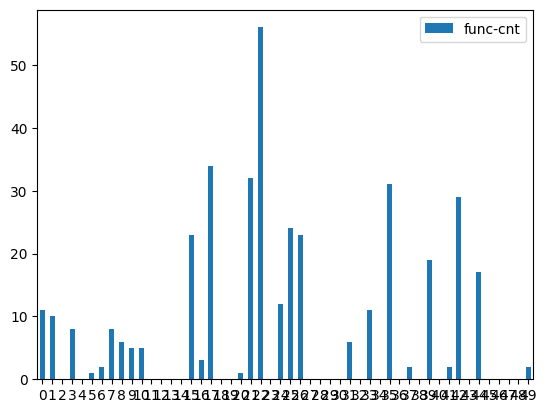

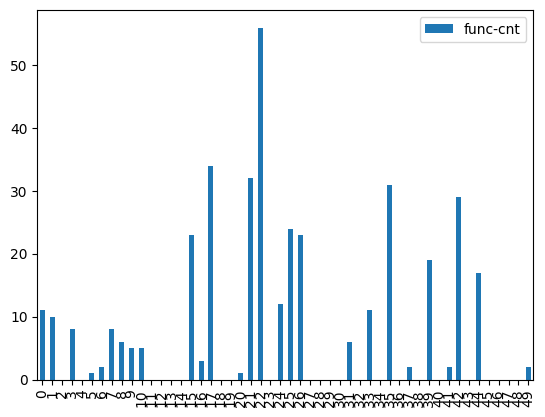

In [5]:
ans = pd.DataFrame(list(frequency_use.items()), columns=["func-name", "func-cnt"])
ans.plot(kind='bar', rot=0)
ans.plot.bar()

<Axes: xlabel='func-name'>

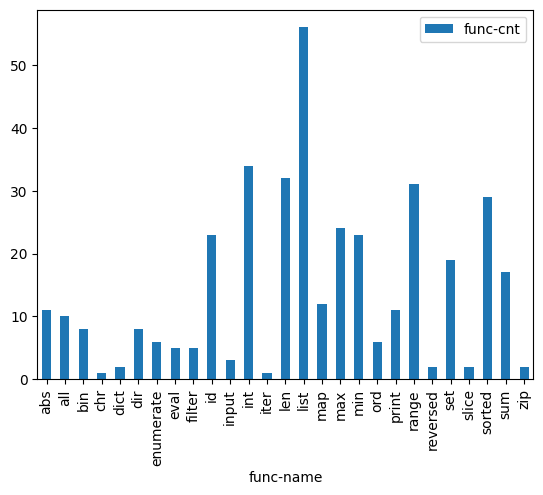

In [20]:
cnt_ans = ans[ans['func-cnt'].values > 0]
cnt_ans = cnt_ans.set_index('func-name')
cnt_ans
cnt_ans.plot(kind='bar')  # , rot=0)